In [1]:
#TODO hacer apuntes

# ***API (Application Programming Interface)***

Vivimos en un mundo donde todos están interconectados entre ellos, donde en pocos segundos conseguimos mandar un mensaje a una persona que está incluso a miles de kilómetros y donde, cómodamente desde la cama con nuestro smartphone, podríamos incluso programar encender la máquina del café; pero ¿cómo ocurre esta conexión?

¿Cómo permiten esto los diferentes dispositivos (tablet, pc, smartphone) y las aplicaciones? 

Concretamente, ¿cómo conseguimos hacer todas estas operaciones?

El héroe silencioso y poco citado que te permite hacer todo esto son las Application Programming Interface o mejor conocidas como API. 

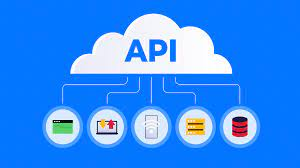

Las APIs (Application Programming Interfaces) son un conjunto de reglas y protocolos que permiten la comunicación entre diferentes aplicaciones y sistemas. Las APIs facilitan la obtención y el intercambio de información entre aplicaciones sin necesidad de conocer los detalles de implementación de cada una de ellas.

![API](https://blog.finerioconnect.com/wp-content/uploads/2020/04/como-funciona-una-api.jpg)

![API](https://media.geeksforgeeks.org/wp-content/uploads/20230216170349/What-is-an-API.png)

## API y las API REST

Por lo general, la API sigue el formato de aplicación a aplicación, mientras que REST (Representational State Transfer que podríamos traducir como transferencia del estado) sigue una estructura diferente: Cliente-Servidor. El cliente y el servidor están evolucionando de forma independiente, proporcionando más flexibilidad en el trabajo.

API de aplicación a aplicación:
Cuando nos referimos a una API en general, nos referimos a un conjunto de reglas y protocolos que permiten la comunicación entre diferentes aplicaciones. En este caso, la comunicación es de aplicación a aplicación, lo que significa que una aplicación solicita información o servicios a otra aplicación.

Un ejemplo de API de aplicación a aplicación es la API de Twitter. Esta API permite a los desarrolladores interactuar con la plataforma de Twitter para realizar acciones como publicar tweets, acceder a tweets publicados, buscar usuarios, entre otros. En este caso, una aplicación (por ejemplo, una aplicación de análisis de redes sociales) se comunica directamente con la aplicación de Twitter a través de su API.



Arquitectura REST (Cliente-Servidor):
REST (Representational State Transfer) es un estilo de arquitectura que se utiliza comúnmente en la implementación de servicios web. En una arquitectura REST, se sigue un patrón de Cliente-Servidor. El cliente (generalmente una aplicación web, móvil o de escritorio) realiza solicitudes a un servidor que proporciona recursos y servicios. El cliente y el servidor evolucionan de forma independiente, lo que permite mayor flexibilidad en el desarrollo y mantenimiento de cada uno de ellos.

Un ejemplo de arquitectura REST es la API de OpenWeatherMap. OpenWeatherMap proporciona datos meteorológicos a través de una API RESTful. Un cliente (por ejemplo, una aplicación móvil del tiempo) realiza solicitudes a la API de OpenWeatherMap utilizando el protocolo HTTP, y el servidor de OpenWeatherMap responde con los datos meteorológicos solicitados.

_________

Para interactuar con una API, generalmente necesitarás realizar solicitudes HTTP. Python tiene una biblioteca popular llamada requests que facilita la realización de solicitudes HTTP. Primero, asegúrate de instalar la biblioteca requests ejecutando:

In [5]:
# !pip install requests 

Para realizar una solicitud HTTP, puedes utilizar los métodos proporcionados por requests, como ``get``, ``post``, ``put`` y ``delete``. Por ejemplo, si deseas obtener datos de una API mediante una solicitud ``GET``, puedes hacer lo siguiente:

``MÉTODO POST``

Se usa comúnmente para comunicar al servidor la finalización de una operación específica, por ejemplo, para activar el desencadenador de otros scripts. Si es necesario, puede contener un paquete de información para pasar al servidor.

A menudo se usa mucho en lugar del método PUT para actualizar datos.

``MÉTODO GET``

Es el método que el buscador aplica de default para cada una de nuestras peticiones, para entendernos, cuando navegamos en un sitio web o hacemos clic en un enlace estamos efectuando una GET hacia ese recurso.

``MÉTODO PUT``

Según los principios REST tendría que ser usado para crear o actualizar un dato. Por ejemplo si llamáramos PUT/blog/artículo-2 estamos comunicando al server querer crear un nuevo artículo, llamado artículo-2.

``MÉTODO DELETE``

Es el contrario del PUT, se invoca cuando desea eliminar un recurso del servidor.

In [4]:
import requests

url = 'https://api.example.com/data'
response = requests.get(url)

ConnectionError: HTTPSConnectionPool(host='api.example.com', port=443): Max retries exceeded with url: /data (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x111994890>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

La variable response contendrá la respuesta HTTP, incluyendo el código de estado y los datos devueltos por la API. Puedes verificar el código de estado con response.status_code y acceder a los datos de la respuesta con response.json() si la API devuelve datos en formato JSON.

Una vez que hayas obtenido los datos de la API, es posible que desees manipularlos, analizarlos o almacenarlos en un formato estructurado. Pandas es una biblioteca popular de Python para el análisis y la manipulación de datos.

Supongamos que la API devuelve datos en formato JSON con una estructura similar a esta:

```
  {"datos": [
    {"id": 1, "nombre": "Juan", "edad": 33},
    {"id": 2, "nombre": "Carla", "edad": 23},
    {"id": 3, "nombre": "Manuel", "edad": 57}
  ]}
```

Después de realizar la solicitud y obtener la respuesta en formato JSON, puedes convertir los datos en un DataFrame de Pandas:

In [ ]:
import pandas as pd
data = response.json()
df = pd.DataFrame(data['data'])

NameError: name 'response' is not defined

--------------

## Ejemplo Practico:

### POKEAPI

Para este ejmeplo vamos a utilizar la API [POKEAPI](https://pokeapi.co/)

Lo primero que tenemos que hacer antes de `"atacar"` una API es leer la documentacion para saber que parametros utiliza y que informacion puedo obtener

Ya leido la documentacion podemos empezar a `"atacar"` la API para crear una DataFrame y poder hacer nuestro analisis de datos

Lo podemos dividir en 4 pasos:

Pado 1: Obtener nombres e ID de Pokémon y guardar en DataFrame

In [6]:
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [8]:
url = "https://pokeapi.co/api/v2/pokemon?limit=2000"
response = requests.get(url)
data = response.json()
pokemons = data["results"]

pokemon_df = pd.DataFrame(columns=["id", "name", "url"])

for index, pokemon in enumerate(pokemons, start=1):
    pokemon_df = pokemon_df.append({"id": index, "name": pokemon["name"], "url": pokemon["url"]}, ignore_index=True)

pokemon_df.head()

,id,name,url
0,1,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/
1,2,ivysaur,https://pokeapi.co/api/v2/pokemon/2/
2,3,venusaur,https://pokeapi.co/api/v2/pokemon/3/
3,4,charmander,https://pokeapi.co/api/v2/pokemon/4/
4,5,charmeleon,https://pokeapi.co/api/v2/pokemon/5/


Esta parte del código crea un DataFrame con los nombres e ID de los Pokémon.

Paso 2: Extraer tipos y habilidades de cada Pokémon y agregarlos al DataFrame

In [9]:
def get_pokemon_details(pokemon_url):
    response = requests.get(pokemon_url)
    pokemon_data = response.json()
    
    types = [t["type"]["name"] for t in pokemon_data["types"]]
    abilities = [a["ability"]["name"] for a in pokemon_data["abilities"]]
    
    return types, abilities

pokemon_df["types"] = None
pokemon_df["abilities"] = None

for index, row in pokemon_df.iterrows():
    pokemon_url = row["url"]
    types, abilities = get_pokemon_details(pokemon_url)
    
    pokemon_df.at[index, "types"] = ", ".join(types)
    pokemon_df.at[index, "abilities"] = ", ".join(abilities)

pokemon_df.head()

,id,name,url,types,abilities
0,1,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/,"grass, poison","overgrow, chlorophyll"
1,2,ivysaur,https://pokeapi.co/api/v2/pokemon/2/,"grass, poison","overgrow, chlorophyll"
2,3,venusaur,https://pokeapi.co/api/v2/pokemon/3/,"grass, poison","overgrow, chlorophyll"
3,4,charmander,https://pokeapi.co/api/v2/pokemon/4/,fire,"blaze, solar-power"
4,5,charmeleon,https://pokeapi.co/api/v2/pokemon/5/,fire,"blaze, solar-power"


Esta parte del código agrega las columnas 'types' y 'abilities' al DataFrame existente y llena cada fila con la información correspondiente. 

Paso 3: Extraer estadísticas base de cada Pokémon y agregarlas al DataFrame

In [10]:
def get_base_stats(pokemon_data):
    base_stats = {}
    
    for stat in pokemon_data["stats"]:
        stat_name = stat["stat"]["name"]
        base_value = stat["base_stat"]
        base_stats[stat_name] = base_value
    
    return base_stats

stat_columns = ["hp", "attack", "defense", "special-attack", "special-defense", "speed"]

for column in stat_columns:
    pokemon_df[column] = None

for index, row in pokemon_df.iterrows():
    pokemon_url = row["url"]
    response = requests.get(pokemon_url)
    pokemon_data = response.json()
    
    base_stats = get_base_stats(pokemon_data)
    
    for stat, value in base_stats.items():
        pokemon_df.at[index, stat] = value

pokemon_df.head()

,id,name,url,types,abilities,hp,attack,defense,special-attack,special-defense,speed
0,1,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/,"grass, poison","overgrow, chlorophyll",45,49,49,65,65,45
1,2,ivysaur,https://pokeapi.co/api/v2/pokemon/2/,"grass, poison","overgrow, chlorophyll",60,62,63,80,80,60
2,3,venusaur,https://pokeapi.co/api/v2/pokemon/3/,"grass, poison","overgrow, chlorophyll",80,82,83,100,100,80
3,4,charmander,https://pokeapi.co/api/v2/pokemon/4/,fire,"blaze, solar-power",39,52,43,60,50,65
4,5,charmeleon,https://pokeapi.co/api/v2/pokemon/5/,fire,"blaze, solar-power",58,64,58,80,65,80


Esta parte del código agrega las columnas de estadísticas base al DataFrame existente y llena cada fila con la información correspondiente.

Paso 4: Guardar el DataFrame en un archivo CSV y, opcionalmente, en una base de datos SQLite

In [11]:
# Guardar el DataFrame en un archivo CSV
csv_output_file = "pokemon_data.csv"
pokemon_df.to_csv(csv_output_file, index=False)
print(f"Archivo CSV guardado como: {csv_output_file}")

Archivo CSV guardado como: pokemon_data.csv


In [12]:
import os
import sqlite3

# Opcional: Guardar el DataFrame en una base de datos SQLite
sqlite_output_file = "pokemon_data.db"

if not os.path.exists(sqlite_output_file):
    conn = sqlite3.connect(sqlite_output_file)
    cursor = conn.cursor()
    
    pokemon_df.to_sql("pokemon", conn, if_exists="replace", index=False)
    conn.commit()
    
    print(f"Base de datos SQLite guardada como: {sqlite_output_file}")
    
    conn.close()

### EDA

Presentacion...

Datos personales...

Indice...

Introduccion....

##### **Librerias**

In [13]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

##### **Cargar el DataFrame**

In [14]:
pokemon_df = pd.read_csv('pokemon_data.csv')

##### **Primer Analisis del DataFrame**

In [15]:
pokemon_df.head()

,id,name,url,types,abilities,hp,attack,defense,special-attack,special-defense,speed
0,1,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/,"grass, poison","overgrow, chlorophyll",45,49,49,65,65,45
1,2,ivysaur,https://pokeapi.co/api/v2/pokemon/2/,"grass, poison","overgrow, chlorophyll",60,62,63,80,80,60
2,3,venusaur,https://pokeapi.co/api/v2/pokemon/3/,"grass, poison","overgrow, chlorophyll",80,82,83,100,100,80
3,4,charmander,https://pokeapi.co/api/v2/pokemon/4/,fire,"blaze, solar-power",39,52,43,60,50,65
4,5,charmeleon,https://pokeapi.co/api/v2/pokemon/5/,fire,"blaze, solar-power",58,64,58,80,65,80


In [16]:
pokemon_df.shape

(1279, 11)

In [17]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1279 non-null   int64 
 1   name             1279 non-null   object
 2   url              1279 non-null   object
 3   types            1279 non-null   object
 4   abilities        1279 non-null   object
 5   hp               1279 non-null   int64 
 6   attack           1279 non-null   int64 
 7   defense          1279 non-null   int64 
 8   special-attack   1279 non-null   int64 
 9   special-defense  1279 non-null   int64 
 10  speed            1279 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 110.0+ KB


In [18]:
pokemon_df.describe(include='all')

,id,name,url,types,abilities,hp,attack,defense,special-attack,special-defense,speed
count,1279.000000,1279,1279,1279,1279,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
unique,NaN,1279,1279,218,687,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/,water,levitate,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,1,84,36,NaN,NaN,NaN,NaN,NaN,NaN
mean,640.000000,NaN,NaN,NaN,NaN,70.942924,81.405786,74.842846,73.317435,72.655981,70.884285
std,369.359807,NaN,NaN,NaN,NaN,26.811503,31.824740,30.470327,32.437385,27.434438,30.348870
min,1.000000,NaN,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,320.500000,NaN,NaN,NaN,NaN,53.000000,57.000000,52.000000,50.000000,51.000000,46.500000
50%,640.000000,NaN,NaN,NaN,NaN,70.000000,80.000000,70.000000,65.000000,70.000000,70.000000
75%,959.500000,NaN,NaN,NaN,NaN,85.000000,100.000000,92.000000,95.000000,90.000000,92.000000


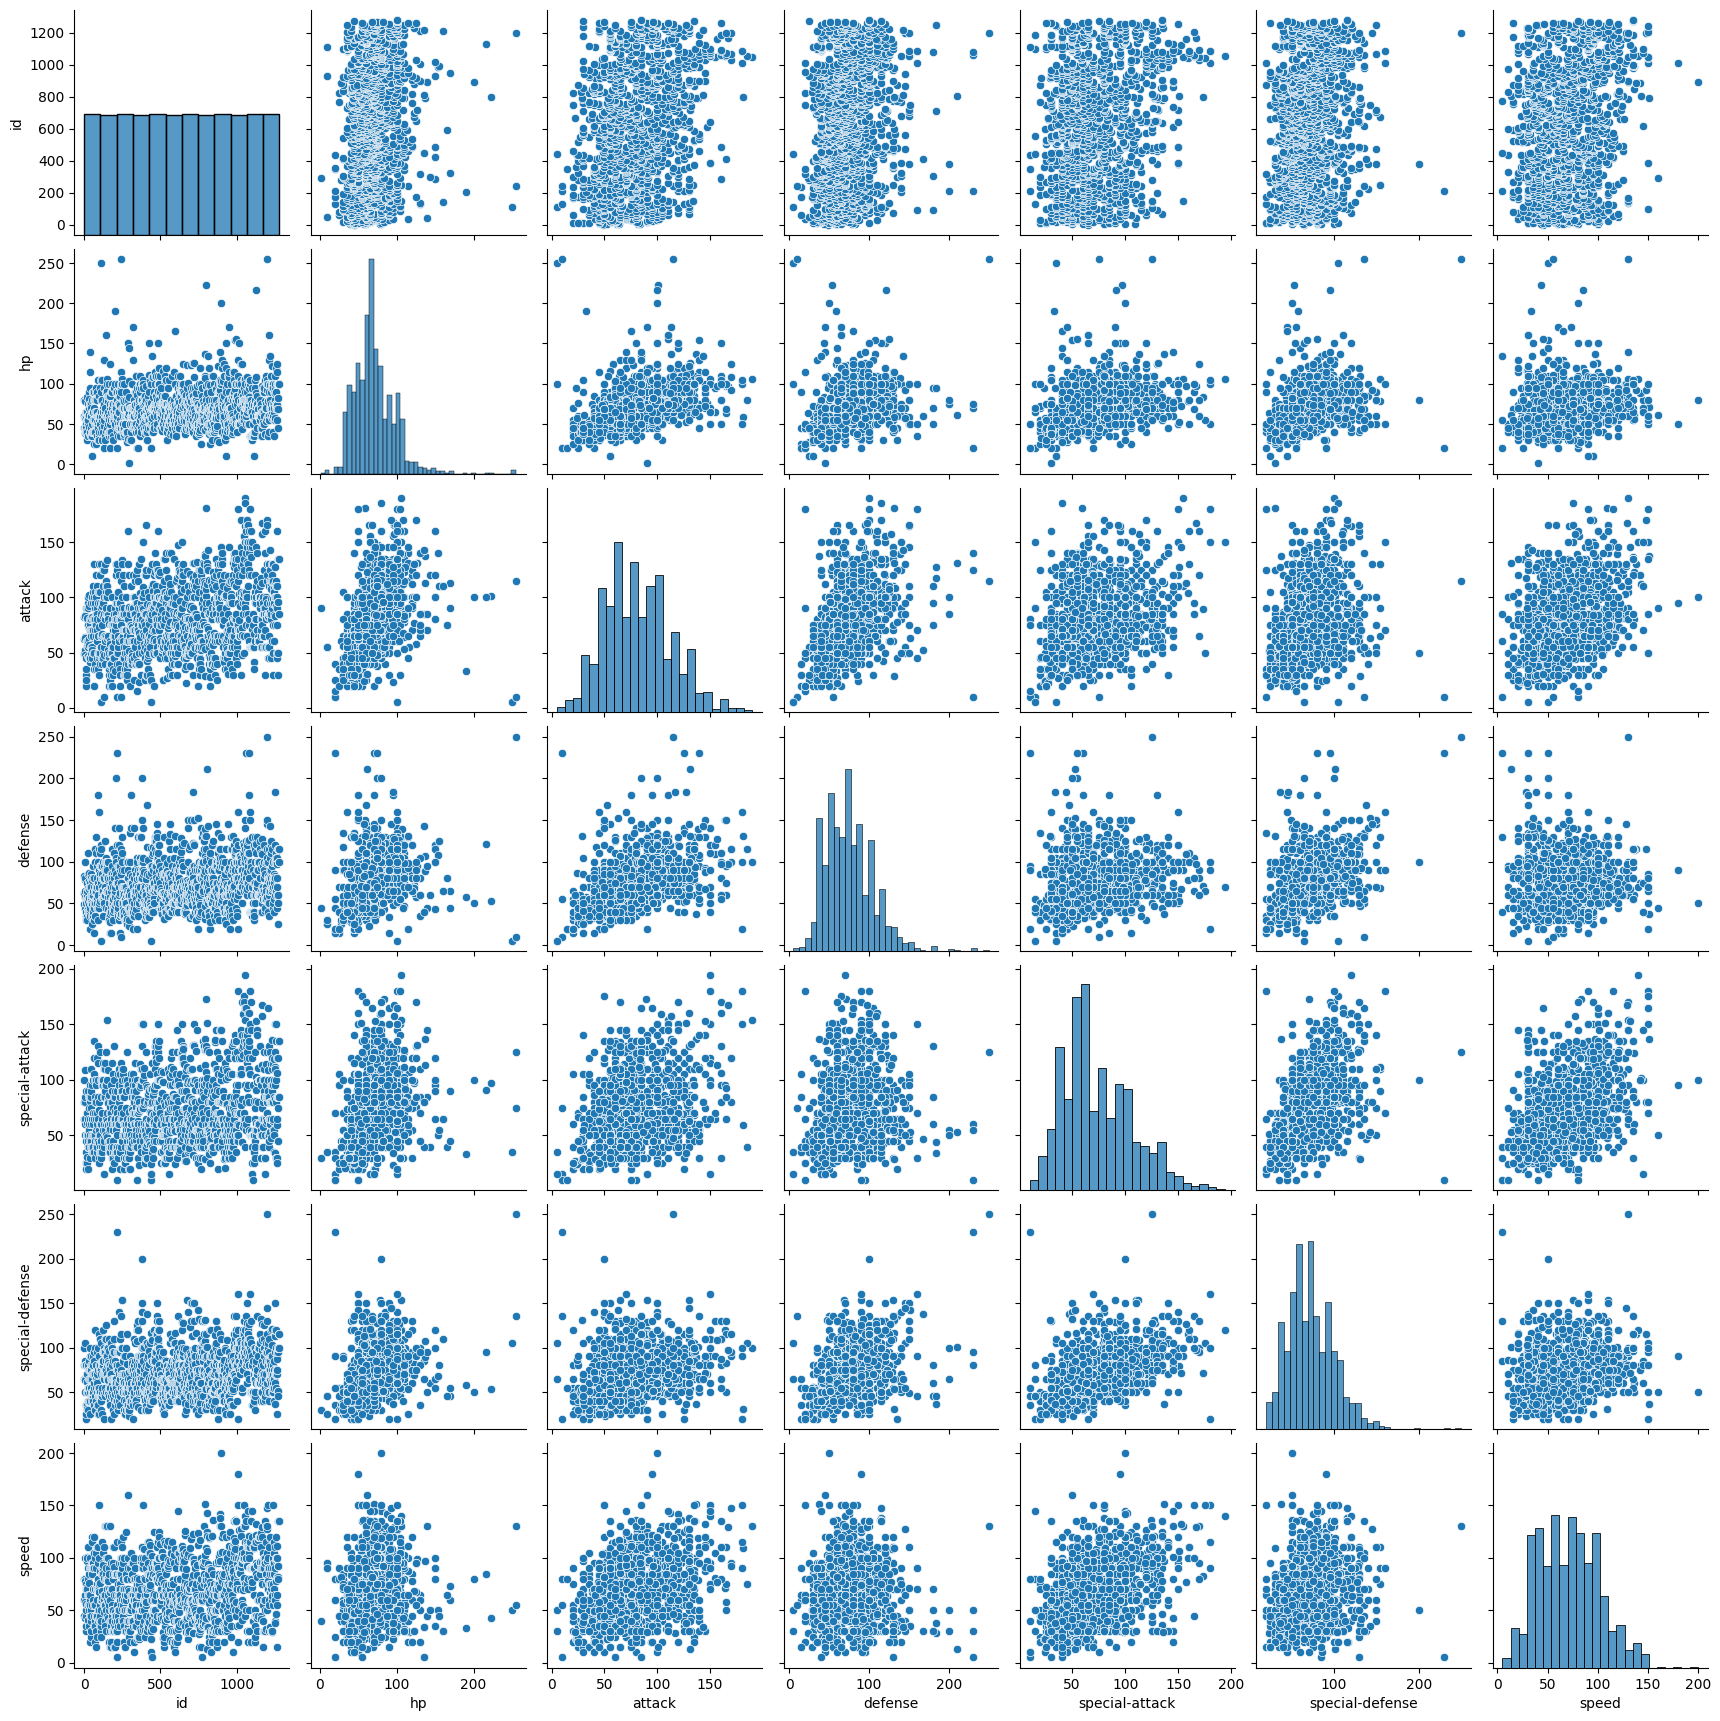

In [19]:
sns.pairplot(pokemon_df)

##### **Hipotesis**

1. Hipótesis 1: No hay diferencia significativa en la media del HP de los Pokémon de tipo Agua y tipo Fuego.
2. Hipótesis 2: La distribución del Ataque entre los tipos de Pokémon es independiente.
3. Hipótesis 3: No hay diferencia significativa en la media de Defensa entre los tipos de Pokémon principales.
4. Hipótesis 4: La distribución de las estadísticas de Ataque de todos los Pokémon sigue una distribución normal.
5. Hipótesis 5: No hay diferencia significativa en las medias de Ataque y Defensa de los Pokémon.
6. Hipótesis 6: Los Pokémon de tipo Dragón tienen un Ataque promedio significativamente mayor que el Ataque promedio de todos los Pokémon.
7. Hipótesis 7: Los Pokémon con la habilidad "Intimidate" tienen un promedio de Defensa significativamente mayor que el promedio de Defensa de todos los Pokémon.
8. Hipótesis 8: La media de las estadísticas totales (suma de HP, Ataque, Defensa, Ataque Especial, Defensa Especial y Velocidad) varía significativamente entre las diferentes generaciones de Pokémon.
9. Hipótesis 9: Los Pokémon de tipo Roca tienen una medida similar al IMC promedio significativamente mayor que los Pokémon de tipo Volador.
10. Hipótesis 10: Existe una correlación positiva entre el Ataque y la Velocidad de los Pokémon.
11. Hipótesis 11: La distribución del Ataque de los Pokémon legendarios es diferente a la de los Pokémon no legendarios.
12. Hipótesis 12: La media de las estadísticas de Velocidad varía significativamente entre los Pokémon de diferentes tipos primarios.
13. Hipótesis 13: La media de Ataque de los Pokémon ha ido aumentando a lo largo de las generaciones.
14. Hipótesis 14: Existe una relación entre el Ataque, la Defensa y el HP de los Pokémon, y esta relación varía según si el Pokémon es legendario o no.
15. Hipótesis 15: La distribución de la Velocidad de los Pokémon varía según su habilidad oculta.

##### Hipotesis 1:

Para probar esta hipótesis utilizando una prueba T de Student

In [20]:
# Filtrar el DataFrame para obtener Pokémon de tipo Agua y tipo Fuego
water_pokemon = pokemon_df[pokemon_df["types"].str.contains("water", case=False)]
fire_pokemon = pokemon_df[pokemon_df["types"].str.contains("fire", case=False)]

# Calcular la media y la varianza de ambas muestras
water_hp_mean = np.mean(water_pokemon["hp"])
water_hp_var = np.var(water_pokemon["hp"], ddof=1)
fire_hp_mean = np.mean(fire_pokemon["hp"])
fire_hp_var = np.var(fire_pokemon["hp"], ddof=1)

print("Media de HP de Pokémon de tipo Agua:", water_hp_mean)
print("Varianza de HP de Pokémon de tipo Agua:", water_hp_var)
print("Media de HP de Pokémon de tipo Fuego:", fire_hp_mean)
print("Varianza de HP de Pokémon de tipo Fuego:", fire_hp_var)

# Realizar la prueba T de Student
t_statistic, p_value = stats.ttest_ind_from_stats(
    water_hp_mean, np.sqrt(water_hp_var), len(water_pokemon),
    fire_hp_mean, np.sqrt(fire_hp_var), len(fire_pokemon),
    equal_var=False
)

print("Estadístico t:", t_statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print(f"""Rechazamos la hipótesis nula. 
    y podemos concluir que hay una diferencia significativa 
    en la media del HP de los Pokémon de tipo Agua y tipo Fuego.""")
else:
    print("No podemos rechazar la hipótesis nula.")


Media de HP de Pokémon de tipo Agua: 71.41847826086956
Varianza de HP de Pokémon de tipo Agua: 691.2282905678309
Media de HP de Pokémon de tipo Fuego: 71.58415841584159
Varianza de HP de Pokémon de tipo Fuego: 368.1453465346535
Estadístico t: -0.06089832830223512
Valor p: 0.9514868029891996
No podemos rechazar la hipótesis nula.


##### Hipotesis 2:

Para probar esta hipótesis utilizando la prueba de chi-cuadrado de independencia

In [21]:
from scipy.stats import chi2_contingency

# Obtener todos los tipos de Pokémon
all_types = set()
for index, row in pokemon_df.iterrows():
    types = row["types"].split(", ")
    all_types.update(types)

# Crear una tabla de contingencia vacía
contingency_table = pd.DataFrame(index=all_types, columns=["low_attack", "medium_attack", "high_attack"])

# Definir los límites de las categorías de Ataque
low_attack_limit = 60
high_attack_limit = 120

# Rellenar la tabla de contingencia con la distribución de las estadísticas de Ataque
for poke_type in all_types:
    type_df = pokemon_df[pokemon_df["types"].str.contains(poke_type, case=False)]
    
    low_attack_count = len(type_df[type_df["attack"] < low_attack_limit])
    medium_attack_count = len(type_df[(type_df["attack"] >= low_attack_limit) & (type_df["attack"] < high_attack_limit)])
    high_attack_count = len(type_df[type_df["attack"] >= high_attack_limit])
    
    contingency_table.loc[poke_type] = [low_attack_count, medium_attack_count, high_attack_count]

# Realizar la prueba de chi-cuadrado de independencia
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print("Estadístico chi-cuadrado:", chi2_stat)
print("Valor p:", p_value)
print("Grados de libertad:", dof)

alpha = 0.05
if p_value < alpha:
    print(f"""Rechazamos la hipótesis nula.
     y concluir que la distribución del 
     Ataque no es independiente de los tipos de Pokémon""")
else:
    print("No podemos rechazar la hipótesis nula.")


ValueError: index cannot be a set

Los grados de libertad (abreviado como "dof" o "df" en inglés) son un concepto estadístico que se refiere a la cantidad de valores en un cálculo que tienen la libertad de variar. Los grados de libertad son importantes para determinar la distribución muestral de una estadística y, por lo tanto, para realizar pruebas de hipótesis e intervalos de confianza.

> grados de libertad = (número de filas - 1) * (número de columnas - 1)

##### Hipotesis 3:

Para probar esta hipótesis utilizando ANOVA, primero necesitarás agrupar los Pokémon por su tipo principal (el primer tipo enumerado en la columna "types") y luego comparar las medias de Defensa entre estos grupos.

In [ ]:
from scipy.stats import f_oneway

# Crear una columna con el tipo principal de cada Pokémon
pokemon_df["main_type"] = pokemon_df["types"].apply(lambda x: x.split(", ")[0])

# Obtener todos los tipos principales
main_types = pokemon_df["main_type"].unique()

# Preparar los datos de Defensa para cada tipo principal
defense_data = []
for main_type in main_types:
    type_df = pokemon_df[pokemon_df["main_type"] == main_type]
    defense_data.append(type_df["defense"].values)

# Realizar el análisis de varianza (ANOVA) de un solo factor
f_statistic, p_value = f_oneway(*defense_data)

print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print(f"""Rechazamos la hipótesis nula.
     y concluir que hay una diferencia significativa 
     en la media de Defensa entre los tipos de Pokémon principales""")
else:
    print("No podemos rechazar la hipótesis nula.")


##### Hipotesis 4:

Para probar esta hipótesis utilizando la prueba de Shapiro-Wilk, evaluarás si la distribución de las estadísticas de Ataque de todos los Pokémon se ajusta a una distribución normal.

In [ ]:
from scipy.stats import shapiro

# Obtener los datos de Ataque de todos los Pokémon
attack_data = pokemon_df["attack"].values

# Realizar la prueba de Shapiro-Wilk
statistic, p_value = shapiro(attack_data)

print("Estadístico de Shapiro-Wilk:", statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print(f"""Rechazamos la hipótesis nula.
    y concluir que la distribución de las 
    estadísticas de Ataque de todos los Pokémon 
    no sigue una distribución normal.""")
else:
    print("No podemos rechazar la hipótesis nula.")


##### Hipotesis 5:

Para probar esta hipótesis utilizando la prueba de Wilcoxon Signed-Rank, compararás las estadísticas de Ataque y Defensa de los Pokémon en pares relacionados.

In [ ]:
from scipy.stats import wilcoxon

# Obtener los datos de Ataque y Defensa de todos los Pokémon
attack_data = pokemon_df["attack"].values
defense_data = pokemon_df["defense"].values

# Realizar la prueba de Wilcoxon Signed-Rank
statistic, p_value = wilcoxon(attack_data, defense_data)

print("Estadístico de Wilcoxon Signed-Rank:", statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("""Rechazamos la hipótesis nula. 
    y concluir que hay una diferencia significativa 
    en las medias de Ataque y Defensa de los Pokémon.""")
else:
    print("No podemos rechazar la hipótesis nula.")


##### Hipotesis 6:

Para probar esta hipótesis, utilizaremos una prueba T de Student para muestras independientes para comparar las medias de Ataque de los Pokémon de tipo Dragón y todos los Pokémon.

In [ ]:
from scipy.stats import ttest_ind

# Obtener los datos de Ataque de todos los Pokémon
all_pokemon_attack = pokemon_df["attack"].values

# Filtrar los Pokémon de tipo Dragón
dragon_pokemon = pokemon_df[pokemon_df["types"].str.contains("Dragon", case=False)]

# Obtener los datos de Ataque de los Pokémon de tipo Dragón
dragon_pokemon_attack = dragon_pokemon["attack"].values

# Realizar la prueba T de Student para muestras independientes
statistic, p_value = ttest_ind(dragon_pokemon_attack, all_pokemon_attack)

print("Estadístico T:", statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("""Rechazamos la hipótesis nula. 
    y concluir que hay una diferencia significativa 
    en las medias de Ataque de los Pokémon de tipo 
    Dragón y todos los Pokémon, con los Pokémon de tipo 
    Dragón teniendo un Ataque promedio mayor.""")
else:
    print("No podemos rechazar la hipótesis nula.")


##### Hipotesis 7:

Para probar esta hipótesis, utilizaremos una prueba T de Student para muestras independientes para comparar las medias de Defensa de los Pokémon con la habilidad "Intimidate" y todos los Pokémon.

In [ ]:
from scipy.stats import ttest_ind

# Obtener los datos de Defensa de todos los Pokémon
all_pokemon_defense = pokemon_df["defense"].values

# Filtrar los Pokémon con la habilidad "Intimidate"
intimidate_pokemon = pokemon_df[pokemon_df["abilities"].str.contains("Intimidate", case=False)]

# Obtener los datos de Defensa de los Pokémon con la habilidad "Intimidate"
intimidate_pokemon_defense = intimidate_pokemon["defense"].values

# Realizar la prueba T de Student para muestras independientes
statistic, p_value = ttest_ind(intimidate_pokemon_defense, all_pokemon_defense)

print("Estadístico T:", statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("""Rechazamos la hipótesis nula.
    y concluir que hay una diferencia significativa 
    en las medias de Defensa de los Pokémon con la 
    habilidad "Intimidate" y todos los Pokémon, con los 
    Pokémon con la habilidad "Intimidate" teniendo un 
    promedio de Defensa mayor""")
else:
    print("No podemos rechazar la hipótesis nula.")


##### Hipotesis 8:

Para probar esta hipótesis, utilizaremos ANOVA (Análisis de Varianza) para comparar las medias de las estadísticas totales de los Pokémon en cada generación.

In [ ]:
from scipy.stats import f_oneway

# Crear una columna con las estadísticas totales de cada Pokémon
pokemon_df["total_stats"] = pokemon_df["hp"] + pokemon_df["attack"] + pokemon_df["defense"] + pokemon_df["sp_attack"] + pokemon_df["sp_defense"] + pokemon_df["speed"]

# Obtener todas las generaciones
generations = pokemon_df["generation"].unique()

# Preparar los datos de las estadísticas totales para cada generación
total_stats_data = []
for generation in generations:
    generation_df = pokemon_df[pokemon_df["generation"] == generation]
    total_stats_data.append(generation_df["total_stats"].values)

# Realizar el análisis de varianza (ANOVA) de un solo factor
f_statistic, p_value = f_oneway(*total_stats_data)

print("Estadístico F:", f_statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("""Rechazamos la hipótesis nula.
    y concluir que hay una diferencia significativa 
    en las medias de las estadísticas totales entre 
    las diferentes generaciones de Pokémon.""")
else:
    print("No podemos rechazar la hipótesis nula.")


Si se enccuentra una diferencia significativa, se puede realizar análisis post-hoc (como la prueba de Tukey HSD) para identificar qué generaciones tienen diferencias significativas en las medias de las estadísticas totales y determinar cuál es la generación más fuerte o más débil en términos de estadísticas totales promedio.

##### Hipotesis 9:

Para probar esta hipótesis, utilizaremos una prueba T de Student para muestras independientes para comparar las medias de la medida similar al IMC de los Pokémon de tipo Roca y tipo Volador.

In [ ]:
from scipy.stats import ttest_ind

# Filtrar los Pokémon de tipo Roca
rock_pokemon = pokemon_df[pokemon_df["types"].str.contains("Rock", case=False)]

# Obtener los datos de la medida similar al IMC de los Pokémon de tipo Roca
rock_pokemon_imc = rock_pokemon["pokemon_imc"].values

# Filtrar los Pokémon de tipo Volador
flying_pokemon = pokemon_df[pokemon_df["types"].str.contains("Flying", case=False)]

# Obtener los datos de la medida similar al IMC de los Pokémon de tipo Volador
flying_pokemon_imc = flying_pokemon["pokemon_imc"].values

# Realizar la prueba T de Student para muestras independientes
statistic, p_value = ttest_ind(rock_pokemon_imc, flying_pokemon_imc)

print("Estadístico T:", statistic)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("""Rechazamos la hipótesis nula.
    y concluir que hay una diferencia significativa 
    en las medias de la medida similar al IMC entre 
    los Pokémon de tipo Roca y tipo Volador, con los 
    Pokémon de tipo Roca teniendo una medida similar al 
    IMC promedio mayor. """)
else:
    print("No podemos rechazar la hipótesis nula.")


##### Hipotesis 10:

Para explorar visualmente esta hipótesis, podemos crear un gráfico de dispersión usando seaborn que muestre la relación entre el Ataque y la Velocidad de los Pokémon

In [ ]:
# Crear el gráfico de dispersión usando seaborn
sns.scatterplot(data=pokemon_df, x="attack", y="speed")

# Establecer títulos y etiquetas
plt.title("Relación entre Ataque y Velocidad de los Pokémon")
plt.xlabel("Ataque")
plt.ylabel("Velocidad")

# Mostrar el gráfico
plt.show()


##### Hipotesis 11:

Para explorar visualmente esta hipótesis, podemos crear un gráfico de cajas (box plot) usando seaborn que muestre la distribución del Ataque para los Pokémon legendarios y no legendarios

In [ ]:
# Crear el gráfico de cajas usando seaborn
sns.boxplot(data=pokemon_df, x="is_legendary", y="attack")

# Establecer títulos y etiquetas
plt.title("Distribución del Ataque de Pokémon legendarios y no legendarios")
plt.xlabel("Es legendario")
plt.ylabel("Ataque")

# Mostrar el gráfico
plt.show()


##### Hipotesis 12:

Para explorar visualmente esta hipótesis, podemos crear un gráfico de barras usando seaborn que muestre la media de la Velocidad para cada tipo primario de Pokémon

In [ ]:
# Crear el gráfico de barras usando seaborn
sns.barplot(data=pokemon_df, x="primary_type", y="speed", estimator=lambda x: sum(x) / len(x))

# Establecer títulos y etiquetas
plt.title("Media de Velocidad de los Pokémon por Tipo Primario")
plt.xlabel("Tipo Primario")
plt.ylabel("Velocidad Media")

# Girar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


##### Hipotesis 13:

Para explorar visualmente esta hipótesis, podemos crear un gráfico lineal usando seaborn que muestre la media de Ataque de los Pokémon en cada generación

In [ ]:
# Calcular la media de Ataque por generación
mean_attack_by_generation = pokemon_df.groupby("generation")["attack"].mean().reset_index()

# Crear el gráfico lineal usando seaborn
sns.lineplot(data=mean_attack_by_generation, x="generation", y="attack")

# Establecer títulos y etiquetas
plt.title("Media de Ataque de los Pokémon por Generación")
plt.xlabel("Generación")
plt.ylabel("Ataque Medio")

# Mostrar el gráfico
plt.show()


##### Hipotesis 14:

Para explorar visualmente esta hipótesis, podemos crear un gráfico de burbujas usando seaborn con relplot que muestre la relación entre el Ataque, la Defensa y el HP de los Pokémon, y cómo se agrupan según si son legendarios o no

In [ ]:
# Crear el gráfico de burbujas usando seaborn con relplot
g = sns.relplot(data=pokemon_df, x="attack", y="defense", size="hp", hue="is_legendary", palette=["b", "r"], sizes=(20, 200), alpha=.5, aspect=1.5)

# Establecer títulos y etiquetas
g.fig.suptitle("Relación entre Ataque, Defensa y HP de Pokémon, diferenciados por Legendarios")
g.ax.set_xlabel("Ataque")
g.ax.set_ylabel("Defensa")

# Mostrar el gráfico
plt.show()


##### Hipotesis 15:

Para explorar visualmente esta hipótesis, podemos crear un gráfico de violín usando seaborn que muestre la distribución de la Velocidad de los Pokémon según su habilidad oculta. Supongamos que queremos analizar las habilidades ocultas más comunes entre los Pokémon

In [ ]:
# Filtrar las habilidades ocultas más comunes (por ejemplo, las 5 más comunes)
top_hidden_abilities = pokemon_df["hidden_ability"].value_counts().head(5).index
filtered_pokemon_df = pokemon_df[pokemon_df["hidden_ability"].isin(top_hidden_abilities)]

# Crear el gráfico de violín usando seaborn
sns.violinplot(data=filtered_pokemon_df, x="hidden_ability", y="speed", inner="quartile")

# Establecer títulos y etiquetas
plt.title("Distribución de la Velocidad de los Pokémon por Habilidad Oculta")
plt.xlabel("Habilidad Oculta")
plt.ylabel("Velocidad")

# Girar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()
 